In [1]:
#importing the required libraries into python
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis,skew
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#importing the raw dataset
df = pd.read_csv('C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Heart\\Rawdata\\heart_disease_missing.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


In [3]:
#printing the no of rows and columns in the dataset
df.shape

(212, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
dtype: object

### 1.7 [CM5] Data Cleaning

In [5]:
#rounding off the columns as appropriate
df1=df.round({'thal': 0,'chol': 0,'trestbps': 0,'thalach': 0,'oldpeak': 0})
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.0,197.0,0,2.0,116.0,0,1.0,1.0,0,2.0,1
1,43,0,0,132.0,341.0,1,0.0,136.0,1,3.0,1.0,0,3.0,0
2,47,1,2,108.0,243.0,0,1.0,152.0,0,-0.0,2.0,0,2.0,0
3,51,1,2,100.0,NaN,0,1.0,143.0,1,1.0,1.0,0,2.0,1
4,57,1,0,110.0,335.0,0,1.0,143.0,1,3.0,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,NaN,256.0,1,0.0,142.0,1,1.0,1.0,1,1.0,0
208,57,0,0,128.0,303.0,0,0.0,159.0,0,NaN,2.0,1,2.0,1
209,54,1,2,150.0,232.0,0,0.0,165.0,0,2.0,2.0,0,3.0,1
210,41,1,2,130.0,214.0,0,0.0,168.0,0,2.0,1.0,0,2.0,1


In [6]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.780488,244.123762,0.132075,0.560386,149.658654,0.344340,1.125000,1.423810,0.731132,2.355450,0.542453
std,9.145339,0.464130,1.022537,18.053993,46.452024,0.339374,0.535149,22.073742,0.476277,1.295285,0.623622,1.038762,0.586926,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,272.500000,0.000000,1.000000,165.250000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,407.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


In [7]:
#finding the unique values present in the column 'ca'
df1['ca'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
#Removing the rows with 'ca' as value 4 since the range of 'ca' is [0,3]
df2 = df1[(df1.ca!=4)]
df2.shape

(208, 14)

In [9]:
#check for the blanks values in the columns
df2.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64

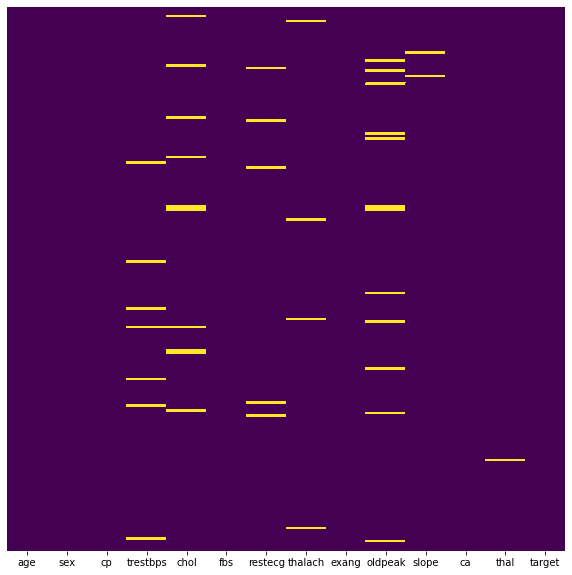

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax);

The heatmap above clearly shows where the missing values are in the dataset

Splitting the data into numeric and categorial columns and replacing the missing values with the median and mode respectively.
For numeric data, mean is influenced by outliers and so we used median to replace the missing values.
For categorical data, using mode makes more sense hence mode was used to replace the missing values.

In [11]:
df_p_n = df2[['age','trestbps','oldpeak','chol','thalach']]
df_p_n1 =df_p_n.fillna(df_p_n.median())

df_p_c = df2[['cp','restecg','slope','thal','sex','fbs','exang','ca','target']]
df_p_c.mode()

,cp,restecg,slope,thal,sex,fbs,exang,ca,target
0,0,1.0,2.0,2.0,1,0,0,0,1


In [12]:
df_p_c['restecg'].fillna('1.0',inplace = True)
df_p_c['slope'].fillna('2.0',inplace = True)
df_p_c['thal'].fillna('2.0',inplace = True)
df_p_c.isnull().sum()

cp         0
restecg    0
slope      0
thal       0
sex        0
fbs        0
exang      0
ca         0
target     0
dtype: int64

In [13]:
#combining the numeric and categorical columns
df_f = pd.concat([df_p_n1, df_p_c], axis=1)
df_f['restecg'] = df_f['restecg'].astype(float)
df_f['slope'] = df_f['slope'].astype(float)
df_f['thal'] = df_f['thal'].astype(float)
df_f

,age,trestbps,oldpeak,chol,thalach,cp,restecg,slope,thal,sex,fbs,exang,ca,target
0,76,140.0,1.0,197.0,116.0,2,2.0,1.0,2.0,0,0,0,0,1
1,43,132.0,3.0,341.0,136.0,0,0.0,1.0,3.0,0,1,1,0,0
2,47,108.0,-0.0,243.0,152.0,2,1.0,2.0,2.0,1,0,0,0,0
3,51,100.0,1.0,242.5,143.0,2,1.0,1.0,2.0,1,0,1,0,1
4,57,110.0,3.0,335.0,143.0,0,1.0,1.0,3.0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,130.0,1.0,256.0,142.0,2,0.0,1.0,1.0,1,1,1,1,0
208,57,128.0,1.0,303.0,159.0,0,0.0,2.0,2.0,0,0,0,1,1
209,54,150.0,2.0,232.0,165.0,2,0.0,2.0,3.0,1,0,0,0,1
210,41,130.0,2.0,214.0,168.0,2,0.0,1.0,2.0,1,0,0,0,1


### 1.5 [CM3]

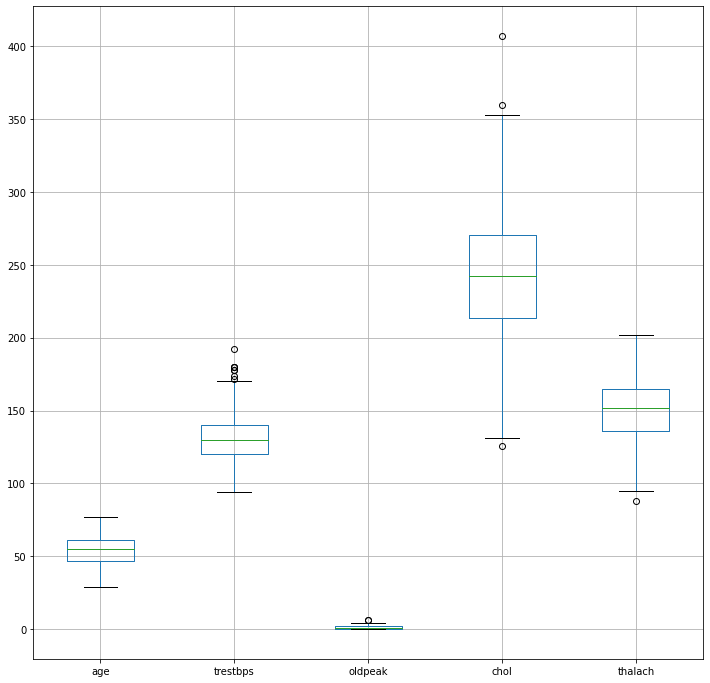

In [14]:
#ploting a boxplot to check for any outliers
fig, ax = plt.subplots(figsize=(12,12))
df_f.boxplot(column=['age','trestbps','oldpeak','chol','thalach'], ax=ax);

There are outliers in the columns trestbps, oldpeak, chol and thalach

In [15]:
#finding the outliers and replacing them with the closest boundary value
cont = ['thalach','age','trestbps','chol','oldpeak'] 
for x in cont:
    df_f.sort_values(by=x)
    x_data = df_f[x]
    quantile1, quantile3= np.percentile(x_data,[25,75])
    iqr_value = quantile3-quantile1
    outliers = df_f[(x_data < quantile1 - (iqr_value * 1.5)) | (x_data > quantile3 + (iqr_value * 1.5))]
    
    df_f[x] = np.where(df_f[x]<(quantile1 - (iqr_value * 1.5)), quantile1 - (iqr_value * 1.5), df_f[x])
    df_f[x] = np.where(df_f[x]>(quantile3 + (iqr_value * 1.5)), quantile3 + (iqr_value * 1.5), df_f[x])    

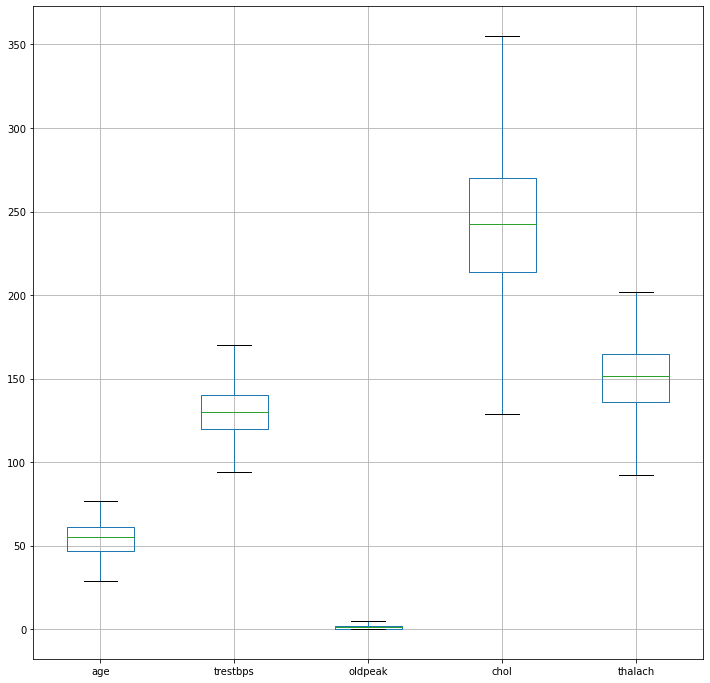

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
df_f.boxplot(column=['age','trestbps','oldpeak','chol','thalach'], ax=ax);

The removal of outliers from the data is negatively impacting the classification perfomance on validation dataset. Hence, we have replaced the ourliers with the closest boundary value (Upper or Lower)

### 1.2 [CM1]

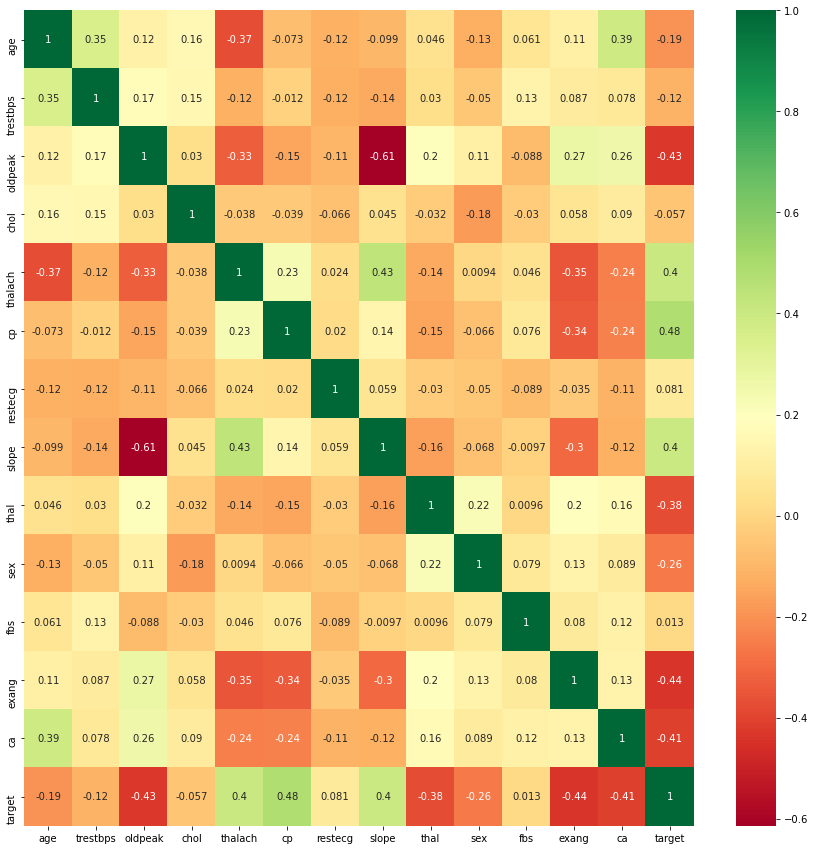

In [17]:
#calculating correlations of each feature in the dataset
corrmat = df_f.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#ploting heat map
g=sns.heatmap(df_f[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From the above heatmap on correlation, we notice tat thalach, cp & slope has good correlation with the target. Also, the featues ca & age, slope & thalach, age & trestbps, exang & oldpeak, thal & sex have little correlation.


There are missing values in the given data for columns trestbps, oldpeak & chol hence it is not advisable to choose them as good features.

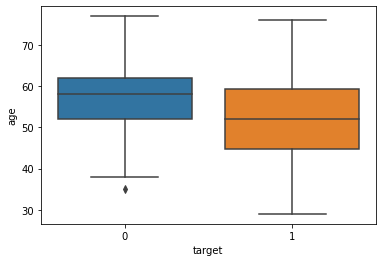

In [18]:
sns.boxplot(x=df_f['target'], y=df_f['age']);

The above box plot of age shows that median ages of diseased and not diseased are almost close. Hence age cannot be the best feature to select 

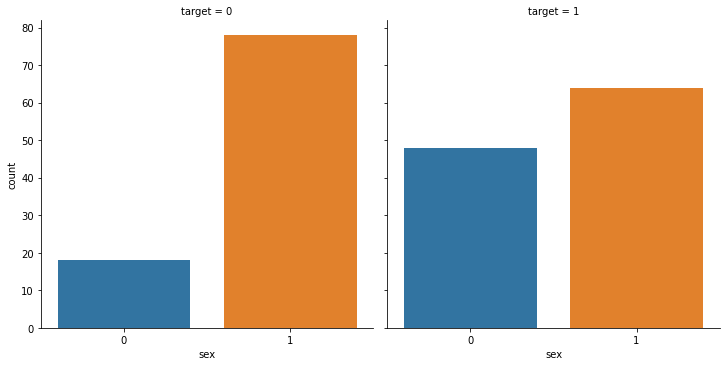

In [19]:
sns.catplot(x='sex', col='target', kind='count', data=df_f);

The above bar graph on sex shows that sex will not be a good feature to select.

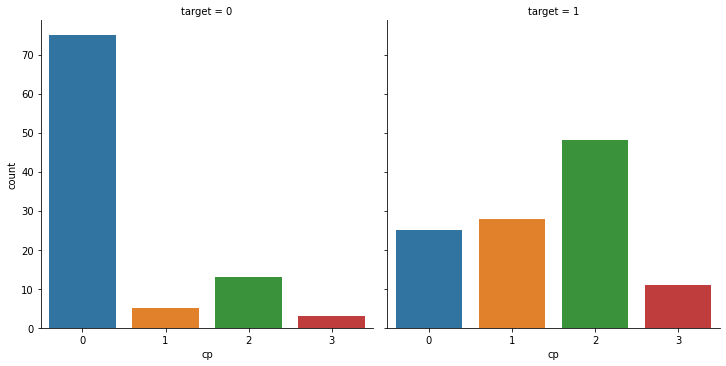

In [20]:
sns.catplot(x='cp', col='target', kind='count', data=df_f);

The above chart shows that the people with heart disease have higer chances of chest pain (1, 2 &3) hence we can cosider this feature

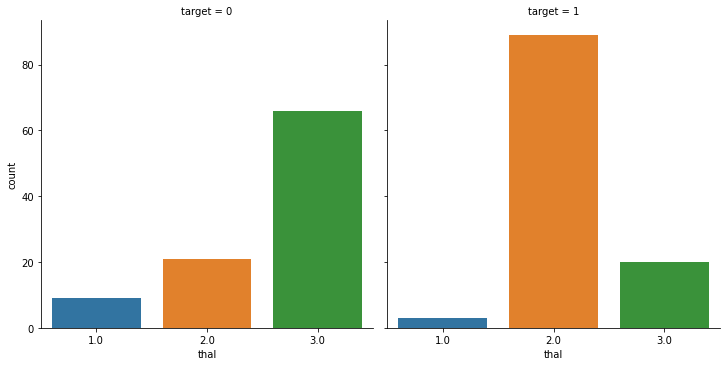

In [21]:
sns.catplot(x='thal', col='target', kind='count', data=df_f);

The above chart shows that the majority of the diseased population have thal =2 (Normal), which is an interesting fact. Hence we can cosider this feature

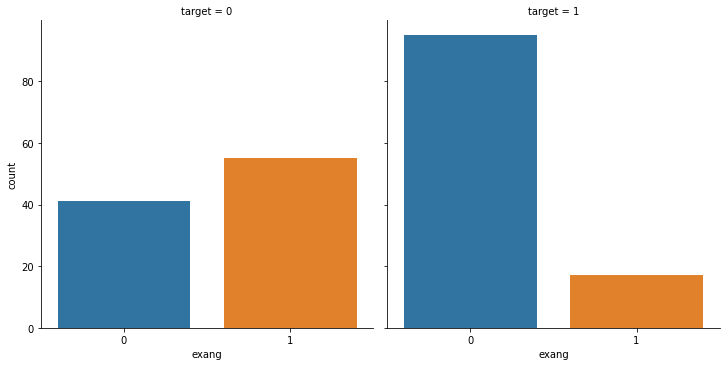

In [22]:
sns.catplot(x='exang', col='target', kind='count', data=df_f);

The above chart shows that the majority of the diseased population has exang =0 (No exercise induced angina), hence we can cosider this feature

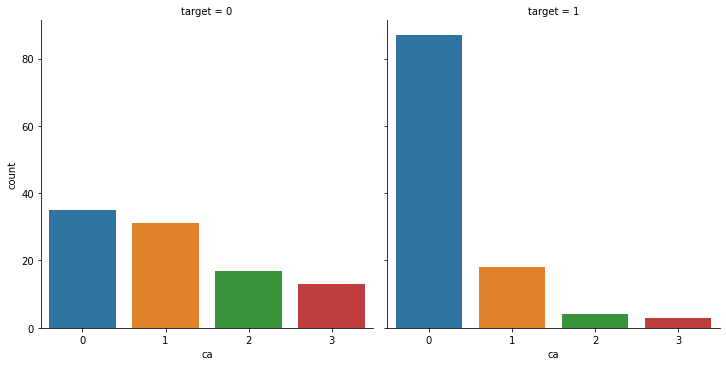

In [23]:
sns.catplot(x='ca', col='target', kind='count', data=df_f);

The above chart shows that the majority of the diseased population has ca =0 hence we can cosider this feature

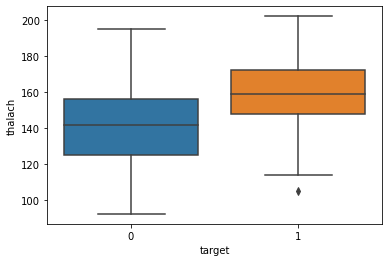

In [24]:
sns.boxplot(x=df_f['target'], y=df_f['thalach']);

The above box plot of thalach shows that the diseased population has more heart rate than the one without disease so we consider this feature 

Based on the above data analysis on the features, we selected 'ca', 'thalach', 'exang', 'thal', 'cp', 'target'.

### 1.1 [CM1]

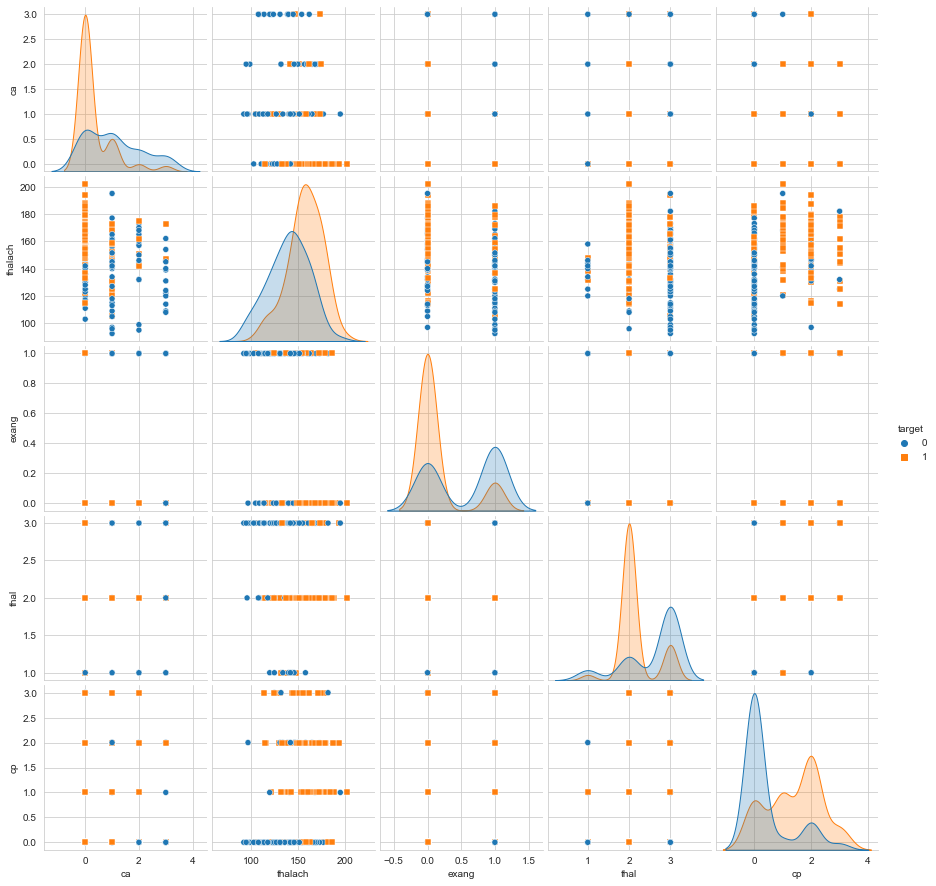

In [25]:
#pair-plot
sns.set_style("whitegrid")
sns.pairplot(df_f[['ca','thalach','exang','thal','cp','target']], hue = 'target',markers=["o", "s"]);

### 1.3 [CM2] 

Below table shows the pearson correlation coefficients between features

In [26]:
#calculating the pearson corelation coefficient for the numeric columns
df_f.corr(method='pearson')

,age,trestbps,oldpeak,chol,thalach,cp,restecg,slope,thal,sex,fbs,exang,ca,target
age,1.000000,0.352367,0.120730,0.157952,-0.371882,-0.073117,-0.120831,-0.099044,0.045797,-0.126680,0.061113,0.112520,0.389111,-0.191928
trestbps,0.352367,1.000000,0.167949,0.154757,-0.118341,-0.011953,-0.123143,-0.140247,0.029824,-0.049920,0.134695,0.086611,0.077755,-0.115895
oldpeak,0.120730,0.167949,1.000000,0.030037,-0.329229,-0.152411,-0.105560,-0.614205,0.203417,0.114521,-0.087725,0.269653,0.258716,-0.429798
chol,0.157952,0.154757,0.030037,1.000000,-0.038192,-0.039455,-0.066451,0.044723,-0.032255,-0.176627,-0.030225,0.057579,0.089651,-0.056817
thalach,-0.371882,-0.118341,-0.329229,-0.038192,1.000000,0.231423,0.023688,0.433293,-0.139719,0.009430,0.046190,-0.350496,-0.244831,0.404092
cp,-0.073117,-0.011953,-0.152411,-0.039455,0.231423,1.000000,0.019817,0.141091,-0.153251,-0.065726,0.076119,-0.338749,-0.238708,0.481454
restecg,-0.120831,-0.123143,-0.105560,-0.066451,0.023688,0.019817,1.000000,0.059030,-0.030445,-0.049582,-0.089055,-0.035013,-0.113698,0.080748
slope,-0.099044,-0.140247,-0.614205,0.044723,0.433293,0.141091,0.059030,1.000000,-0.161762,-0.067581,-0.009712,-0.299392,-0.121430,0.396429
thal,0.045797,0.029824,0.203417,-0.032255,-0.139719,-0.153251,-0.030445,-0.161762,1.000000,0.219624,0.009607,0.195991,0.161466,-0.375338
sex,-0.126680,-0.049920,0.114521,-0.176627,0.009430,-0.065726,-0.049582,-0.067581,0.219624,1.000000,0.078905,0.126935,0.088996,-0.258211


1. age and trestbps have positive correlation where as age is negatively correlated with thalach.
2. thalach and target are positively correlated. Patients with higher talach tend to have heart disease.
3. cp and target are positively correlated. Patients with chest pain tend to have heart disease.

###  1.4 [CM2] 

In [27]:
#calculating the mean for the numeric columns
np.mean(df_f[['age','trestbps','oldpeak','chol','thalach']])

age          54.533654
trestbps    131.274038
oldpeak       1.129808
chol        244.538462
thalach     149.430288
dtype: float64

In [28]:
#calculating the variance for the numeric columns
np.var(df_f[['age','trestbps','oldpeak','chol','thalach']])

age           81.595021
trestbps     287.295095
oldpeak        1.497573
chol        1959.746117
thalach      475.099708
dtype: float64

In [29]:
#calculating the skew for the numeric columns
col = ['age','trestbps','oldpeak','chol','thalach']
for x in col:
    print("skew of {}:     {:.4f} ".format(x,skew(df_f[x])))

skew of age:     -0.1183 
skew of trestbps:     0.4366 
skew of oldpeak:     0.9791 
skew of chol:     0.2108 
skew of thalach:     -0.3658 


The skew values for columns trestbps, chol and oldpeak are > zero. Hence the distributions of these columns are Positively skewed.
The skew values for columns age and thalach are < zero. Hence the distributions of these columns are Negatively skewed.

In [30]:
#calculating the kurtosis for the numeric columns
col = ['age','trestbps','oldpeak','chol','thalach']
for x in col:
    print("kurtosis of {}:     {:.4f} ".format(x,kurtosis(df_f[x])))

kurtosis of age:     -0.5353 
kurtosis of trestbps:     -0.0703 
kurtosis of oldpeak:     0.2276 
kurtosis of chol:     -0.0643 
kurtosis of thalach:     -0.2387 


The Excess kurtosis values for the features age, trestbps, chol thalach and are < zero. Hence the distributions of these features are Platykurtic with flat tails.
However, the excess kurtosis value for the feature oldpeak is > zero. Hence the distribution of this feature is leptokurtic with heavy tails.

### 1.6 [CM4]

Grouping the features based on variable types and plotting the pair plots. From the below graphs, consider the diagonal histogram plots which shows the number of present and absent heart disease cases for each feature.

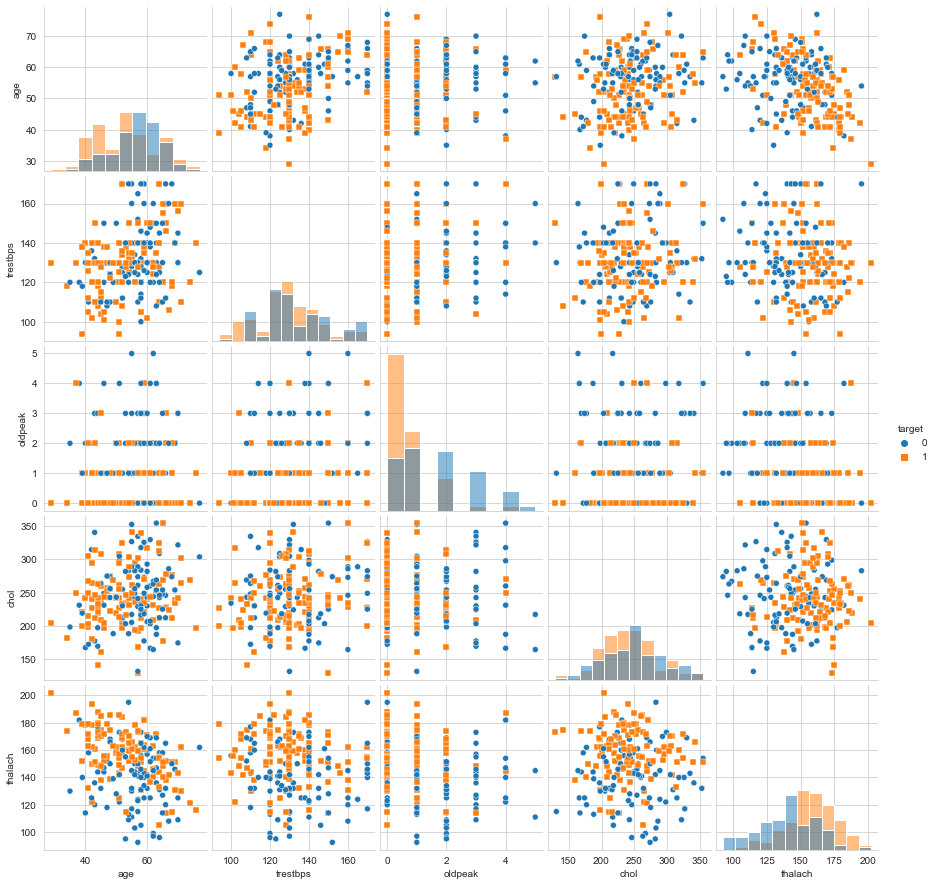

In [31]:
#Numeric features
sns.pairplot(df_f[['age','trestbps','oldpeak','chol','thalach','target']], hue = 'target',diag_kind = 'hist',markers=["o", "s"]);

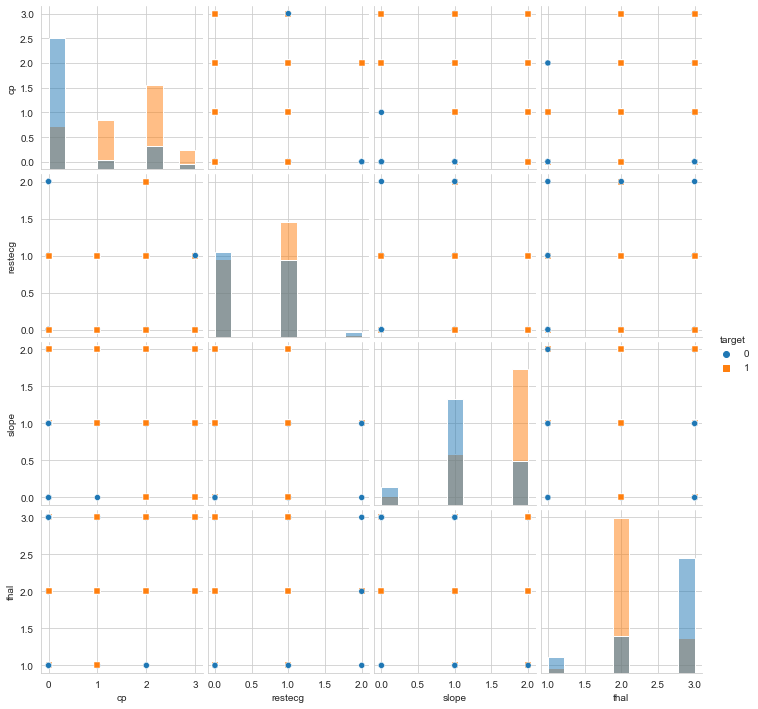

In [32]:
#Categorical features
sns.pairplot(df_f[['cp','restecg','slope','thal','target']], hue = 'target',diag_kind = 'hist',markers=["o", "s"]);

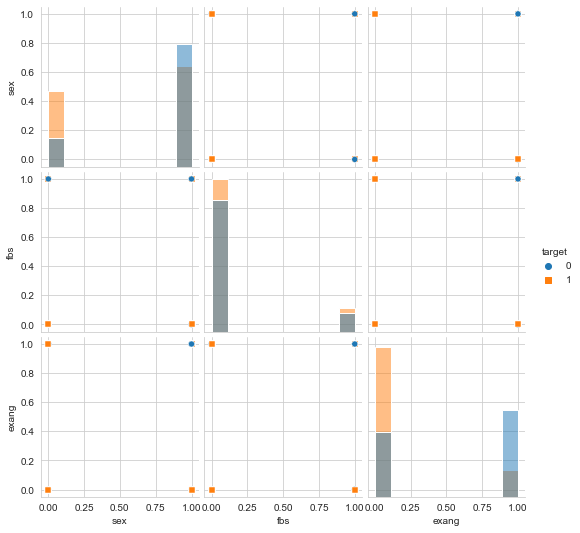

In [33]:
#Binary features
sns.pairplot(df_f[['sex','fbs','exang','target']], hue = 'target',diag_kind = 'hist',markers=["o", "s"]);

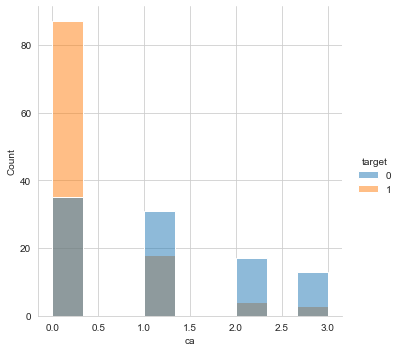

In [34]:
#Ordinal feature
sns.displot(df_f, x='ca', hue="target");

### 2.1

In [35]:
df_f['restecg'] = df_f['restecg'].astype(int)
df_f['slope'] = df_f['slope'].astype(int)
df_f['thal'] = df_f['thal'].astype(int)

#performing the one hot encoding for the categorial, Binary and Ordinal columns

dataset = pd.get_dummies(df_f, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset

,age,trestbps,oldpeak,chol,thalach,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,76.0,140.0,1.0,197.0,116.0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,43.0,132.0,3.0,341.0,136.0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,47.0,108.0,-0.0,243.0,152.0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
3,51.0,100.0,1.0,242.5,143.0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,57.0,110.0,3.0,335.0,143.0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56.0,130.0,1.0,256.0,142.0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
208,57.0,128.0,1.0,303.0,159.0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
209,54.0,150.0,2.0,232.0,165.0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
210,41.0,130.0,2.0,214.0,168.0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
#Dividiing each dataset into features(X) and target(Y)
target=["target"]
cols=[col for col in dataset.columns if col not in target]

x=dataset[cols]
y=dataset[target]

#Splitting the data into train, validation, and test sets (60%, 20%, 20%)
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

#Creating an instance of the classifier
Knc=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#Fit the classifier to training data
Knc.fit(train_x,train_y)

KNeighborsClassifier()

### 2.2

In [37]:
#The model is tested on test data
test = Knc.predict(test_x)

acc_k_5 = metrics.accuracy_score(test_y,test)
print('Accuracy of model on test data for default values of KNN Classifier: {:.2f}'.format(acc_k_5))

Accuracy of model on test data for default values of KNN Classifier: 0.57


### 2.3

In [38]:
#From the given set of k values, finding the best k
k_val = [1,5,10,15,20,25,30,35]
res_list = []
for k in k_val:
    z=KNeighborsClassifier(n_neighbors=k)
    z.fit(train_x,train_y)
    n=z.predict(valid_x)
    res = round(metrics.accuracy_score(valid_y,n),2)
    res_list.append(res)
df= pd.DataFrame(res_list,k_val,columns = ['Accuracy scores on Validation data'])
df

,Accuracy scores on Validation data
1,0.69
5,0.67
10,0.62
15,0.62
20,0.52
25,0.71
30,0.69
35,0.69


### 2.3 [CM6]

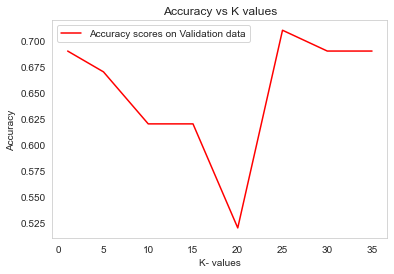

In [39]:
#Plot graph for different k values and corresponding accuracy scores
df.plot(color='red');
plt.grid();
plt.title('Accuracy vs K values');
plt.xlabel('K- values');
plt.ylabel('Accuracy');

For K=25, we have the highest accuracy score on validation data. Choosing k=25 for further calculations

### 2.4 [CM7]

In [40]:
#Fitting the model with train data and testing on test set with k=25

z=KNeighborsClassifier(n_neighbors=25)
z.fit(train_x,train_y)
n=z.predict(test_x)

result=(metrics.accuracy_score(test_y, n))
print('Accuracy on test set for K=25: {:.2f}'.format(result))

f1score=f1_score(test_y, n, average='macro')
print("F1-Score is : {:.2f}".format(f1score))

fpr, tpr, thresholds = metrics.roc_curve(test_y, n)
auc=metrics.auc(fpr, tpr)

print('AUC of the model on test data: {:.2f}'.format(auc))

Accuracy on test set for K=25: 0.71
F1-Score is : 0.70
AUC of the model on test data: 0.70


### 2.5

In [41]:
#Using Standardization

y=dataset[target]
dataset1=dataset.copy()
scale = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])
dataset2 = dataset1.drop('target',axis=1)

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(dataset2, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on validation data after standardization: {:.2f}'.format(acc_k))

Accuracy of model on validation data after standardization: 0.86


In [42]:
#Using Normalization (Min Max)

y=dataset[target]
dataset1=dataset.copy()
scale = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])
dataset2 = dataset1.drop('target',axis=1)

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(dataset2, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on validation data after Normalization: {:.2f}'.format(acc_k))

Accuracy of model on validation data after Normalization: 0.88


We have used Standardization and Min Max Normalization techniques on the dataset. For Standardization the accuracy of the model was 86% and when Normalized, the accuracy was 88%. So in this case Normalization on the dataset gave better accuracy.

### 2.6

In [43]:
#Accuracy using Normalized data, weights = "distance" using "Manhatten Distance" i.e p=1
y=dataset[target]
dataset1=dataset.copy()
scale = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])
dataset2 = dataset1.drop('target',axis=1)

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(dataset2, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='auto',leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on validation data after Normalization  with modified weights: {:.2f}'.format(acc_k))

Accuracy of model on validation data after Normalization  with modified weights: 0.88


In [44]:
#Accuracy using Normalized data, weights = "distance" using "Manhatten Distance" i.e p=2

y=dataset[target]
dataset1=dataset.copy()
scale = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])
dataset2 = dataset1.drop('target',axis=1)

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(dataset2, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on validation data after Normalization  with modified weights: {:.2f}'.format(acc_k))

Accuracy of model on validation data after Normalization  with modified weights: 0.86


We have modified the weights and power parameter for the classifier. For weights = 'distance' and p=1 (Manhatten Distance), the accuracy of the classifer is 88%, for weights = 'distance' and p=2 (Euclidean Distance), the accuracy of the classifer is 86%.

Choosing Manhatten distance gave better accuracy

### 2.7 [CM7]

In [45]:
#Accuracy of the improved model on test data

y=dataset[target]
dataset1=dataset.copy()
scale = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])
dataset2 = dataset1.drop('target',axis=1)

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(dataset2, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(test_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(test_y,test)
print('Accuracy of model on test data after Normalization: {:.2f}'.format(acc_k))

f1score=f1_score(test_y, test, average='macro')
print("F1-Score is : {:.2f}".format(f1score))

fpr, tpr, thresholds = metrics.roc_curve(test_y, test)
auc=metrics.auc(fpr, tpr)

print('AUC of model on test data: {:.2f}'.format(auc))

Accuracy of model on test data after Normalization: 0.86
F1-Score is : 0.85
AUC of model on test data: 0.89
